In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
movie_df = pd.read_csv('All_bollywood_movies_ff22.csv',thousands=',')
movie_df = movie_df.drop(['Unnamed: 0'],axis=1)

In [3]:
movie_df.dtypes

Title               object
Date_of_Release     object
Genre               object
Crew                object
Plot_summary        object
ImDBRating         float64
Votes                int64
dtype: object

In [4]:
movie_df['Date_of_Release'].values

array(['2009', '1999', '2007', ..., '1973', '1971', '1967'], dtype=object)

**from above DF we have seen that some of the values of Date are irregular with additional characters in their values.**

**create a for loop for the processing**

In [5]:
for i in range(3000):
    if len(movie_df['Date_of_Release'][i]) > 4:
        movie_df['Date_of_Release'][i] = movie_df['Date_of_Release'][i][-4:]
    else:
        movie_df['Date_of_Release'][i]

c:\users\hp\anaconda3\envs\contelligence\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


**Now change the type of Date into Integer so that we can calculate Age**

In [6]:
movie_df['Date_of_Release']=movie_df['Date_of_Release'].astype(int)

In [7]:
movie_df['Age_of_content'] = 2021 - movie_df['Date_of_Release']

**I found that some of the records have "Star" instead of "Stars" in their crew column , which will be very problematic for the processing.**

I developed a for loop for replacing the values but I got huge errors from the code. So i did manually for the time being.

In [8]:
movie_df['Crew'][2518] = "['                Stars:Iqbal']"
movie_df['Crew'][2146] = "['    Director:Neville Shah', '     Stars:Gaurav Gupta']"
movie_df['Crew'][2887] = "['    Director:Ezhil Vendan', '     Stars:Rajesh Jolly']"

c:\users\hp\anaconda3\envs\contelligence\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\hp\anaconda3\envs\contelligence\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\hp\anaconda3\envs\contelligence\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

*Lets copy the Data frame into another one for no permanent changes in the original dataframe*

In [9]:
movie_df1 = movie_df.copy()

*Since __Stars:__ is a common word in all the crew records, I am splitting the column using ("Stars:") and developing two individual coulmns one with being Directors and other being actors*

In [10]:
movie_df1['Crew'] = movie_df1['Crew'].str.split('Stars:')

In [11]:
##construct two empty columns for directors and stars

movie_df1['Crew_dir'] ='ra'
movie_df1['Cast_stars'] = 'e'

In [12]:

##Now fill the above columns by splitting the crew column into stars and directors

for i in range(3000):
    movie_df1['Cast_stars'][i] = movie_df1['Crew'][i][1].rstrip(']').rstrip("'") if movie_df1['Crew'][i][1] else '*****'
    movie_df1['Crew_dir'][i] = movie_df1['Crew'][i][0].lstrip('[').lstrip("'    Director:").rstrip("', '     ") if movie_df1['Crew'][i][0] else "****"

c:\users\hp\anaconda3\envs\contelligence\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\users\hp\anaconda3\envs\contelligence\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


**So Final DataFrame with clean data(Kind of) for 3000 movies**

In [13]:
movie_df1

,Title,Date_of_Release,Genre,Crew,Plot_summary,ImDBRating,Votes,Age_of_content,Crew_dir,Cast_stars
0,3 Idiots,2009,"Comedy, Drama","[[' Director:Rajkumar Hirani', ' , Aami...",Two friends are searching for their long lost ...,8.4,366038,12,Rajkumar Hirani,"Aamir Khan, Madhavan, Mona Singh, Sharman Joshi"
1,Cruel Intentions,1999,"Drama, Romance","[[' Director:Roger Kumble', ' , Sarah M...",Two vicious step-siblings of an elite Manhatta...,6.8,184749,22,Roger Kumble,"Sarah Michelle Gellar, Ryan Phillippe, Reese W..."
2,Taare Zameen Par,2007,"Drama, Family","[[' Directors:Aamir Khan, Amole Gupte', ' ...",An eight-year-old boy is thought to be a lazy ...,8.4,179838,14,"s:Aamir Khan, Amole Gupte","Darsheel Safary, Aamir Khan, Tisca Chopra, Vip..."
3,PK,2014,"Comedy, Drama, Musical","[[' Director:Rajkumar Hirani', ' , Aami...",An alien on Earth loses the only device he can...,8.1,171776,7,Rajkumar Hirani,"Aamir Khan, Anushka Sharma, Sanjay Dutt, Boman..."
4,Radhe,2021,"Action, Crime, Thriller","[[' Director:Prabhu Deva', ' , Salman K...","After taking the dreaded gangster Gani Bhai, A...",1.8,171349,0,Prabhu Deva,"Salman Khan, Disha Patani, Randeep Hooda, Jack..."
...,...,...,...,...,...,...,...,...,...,...
2995,Waqt Ki Awaz,1988,"Action, Crime, Drama","[[' Director:K. Bapaiah', ' , Vikas Ana...",Wealthy Lata I. Prasad refuses to obey her wid...,6.3,105,33,K. Bapaiah,"Vikas Anand, Asrani, Mithun Chakraborty, Moush..."
2996,Ilzaam,1986,"Drama, Family","[[' Director:Shibu Mitra', ' , Shashi K...",Ajay is a street dancer and while people are w...,5.9,105,35,Shibu Mitra,"Shashi Kapoor, Shatrughan Sinha, Raj Kiran, An..."
2997,Jheel Ke Us Paar,1973,"Drama, Romance","[[' Director:Bhappi Sonie', ' , Dharmen...",Kulwant Rai's horse carriage runs over a child...,7.2,105,48,Bhappi Sonie,"Dharmendra, Mumtaz, Prem Chopra, Mehmood Jr."
2998,Ashad Ka Ek Din,1971,"Biography, Drama","[[' Director:Mani Kaul', ' , Aruna Iran...",Aashad Ka Ek Din is an adaptation of the play ...,7.4,105,50,Mani Kaul,"Aruna Irani, Arun Khopkar, Rekha Sabnis, Om Sh..."


_Lets delete the original crew column consisting both stars and directors_

In [14]:
movie_df1.drop('Crew',axis=1,inplace=True)

In [15]:
movie_df1

,Title,Date_of_Release,Genre,Plot_summary,ImDBRating,Votes,Age_of_content,Crew_dir,Cast_stars
0,3 Idiots,2009,"Comedy, Drama",Two friends are searching for their long lost ...,8.4,366038,12,Rajkumar Hirani,"Aamir Khan, Madhavan, Mona Singh, Sharman Joshi"
1,Cruel Intentions,1999,"Drama, Romance",Two vicious step-siblings of an elite Manhatta...,6.8,184749,22,Roger Kumble,"Sarah Michelle Gellar, Ryan Phillippe, Reese W..."
2,Taare Zameen Par,2007,"Drama, Family",An eight-year-old boy is thought to be a lazy ...,8.4,179838,14,"s:Aamir Khan, Amole Gupte","Darsheel Safary, Aamir Khan, Tisca Chopra, Vip..."
3,PK,2014,"Comedy, Drama, Musical",An alien on Earth loses the only device he can...,8.1,171776,7,Rajkumar Hirani,"Aamir Khan, Anushka Sharma, Sanjay Dutt, Boman..."
4,Radhe,2021,"Action, Crime, Thriller","After taking the dreaded gangster Gani Bhai, A...",1.8,171349,0,Prabhu Deva,"Salman Khan, Disha Patani, Randeep Hooda, Jack..."
...,...,...,...,...,...,...,...,...,...
2995,Waqt Ki Awaz,1988,"Action, Crime, Drama",Wealthy Lata I. Prasad refuses to obey her wid...,6.3,105,33,K. Bapaiah,"Vikas Anand, Asrani, Mithun Chakraborty, Moush..."
2996,Ilzaam,1986,"Drama, Family",Ajay is a street dancer and while people are w...,5.9,105,35,Shibu Mitra,"Shashi Kapoor, Shatrughan Sinha, Raj Kiran, An..."
2997,Jheel Ke Us Paar,1973,"Drama, Romance",Kulwant Rai's horse carriage runs over a child...,7.2,105,48,Bhappi Sonie,"Dharmendra, Mumtaz, Prem Chopra, Mehmood Jr."
2998,Ashad Ka Ek Din,1971,"Biography, Drama",Aashad Ka Ek Din is an adaptation of the play ...,7.4,105,50,Mani Kaul,"Aruna Irani, Arun Khopkar, Rekha Sabnis, Om Sh..."


*Lets store it as a .csv for future purpose*

In [16]:
movie_df1.to_csv("Imdb_3000_hindimovieslist.csv",index=False)

**Lets prepare a list of Keywords by removing stopwords in each summary**

In [17]:
import nltk
from nltk.corpus import stopwords

In [18]:
stop_words = set(stopwords.words('english'))

In [19]:
movie_df1["Plot_Keywords"] = 'hi'

In [20]:
for i in range(3000):
    movie_df1['Plot_Keywords'][i] =[x for x in movie_df1['Plot_summary'][i].lower().split() if x not in stop_words]

c:\users\hp\anaconda3\envs\contelligence\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
movie_df1['Plot_Keywords']

0       [two, friends, searching, long, lost, companio...
1       [two, vicious, step-siblings, elite, manhattan...
2       [eight-year-old, boy, thought, lazy, trouble-m...
3       [alien, earth, loses, device, use, communicate...
4       [taking, dreaded, gangster, gani, bhai,, acp, ...
                              ...                        
2995    [wealthy, lata, i., prasad, refuses, obey, wid...
2996    [ajay, street, dancer, people, watching, dance...
2997    [kulwant, rai's, horse, carriage, runs, child,...
2998    [aashad, ka, ek, din, adaptation, play, based,...
2999    [raj, singh, nephew, heir, apparent, multi-mil...
Name: Plot_Keywords, Length: 3000, dtype: object

In [22]:
movie_df1

,Title,Date_of_Release,Genre,Plot_summary,ImDBRating,Votes,Age_of_content,Crew_dir,Cast_stars,Plot_Keywords
0,3 Idiots,2009,"Comedy, Drama",Two friends are searching for their long lost ...,8.4,366038,12,Rajkumar Hirani,"Aamir Khan, Madhavan, Mona Singh, Sharman Joshi","[two, friends, searching, long, lost, companio..."
1,Cruel Intentions,1999,"Drama, Romance",Two vicious step-siblings of an elite Manhatta...,6.8,184749,22,Roger Kumble,"Sarah Michelle Gellar, Ryan Phillippe, Reese W...","[two, vicious, step-siblings, elite, manhattan..."
2,Taare Zameen Par,2007,"Drama, Family",An eight-year-old boy is thought to be a lazy ...,8.4,179838,14,"s:Aamir Khan, Amole Gupte","Darsheel Safary, Aamir Khan, Tisca Chopra, Vip...","[eight-year-old, boy, thought, lazy, trouble-m..."
3,PK,2014,"Comedy, Drama, Musical",An alien on Earth loses the only device he can...,8.1,171776,7,Rajkumar Hirani,"Aamir Khan, Anushka Sharma, Sanjay Dutt, Boman...","[alien, earth, loses, device, use, communicate..."
4,Radhe,2021,"Action, Crime, Thriller","After taking the dreaded gangster Gani Bhai, A...",1.8,171349,0,Prabhu Deva,"Salman Khan, Disha Patani, Randeep Hooda, Jack...","[taking, dreaded, gangster, gani, bhai,, acp, ..."
...,...,...,...,...,...,...,...,...,...,...
2995,Waqt Ki Awaz,1988,"Action, Crime, Drama",Wealthy Lata I. Prasad refuses to obey her wid...,6.3,105,33,K. Bapaiah,"Vikas Anand, Asrani, Mithun Chakraborty, Moush...","[wealthy, lata, i., prasad, refuses, obey, wid..."
2996,Ilzaam,1986,"Drama, Family",Ajay is a street dancer and while people are w...,5.9,105,35,Shibu Mitra,"Shashi Kapoor, Shatrughan Sinha, Raj Kiran, An...","[ajay, street, dancer, people, watching, dance..."
2997,Jheel Ke Us Paar,1973,"Drama, Romance",Kulwant Rai's horse carriage runs over a child...,7.2,105,48,Bhappi Sonie,"Dharmendra, Mumtaz, Prem Chopra, Mehmood Jr.","[kulwant, rai's, horse, carriage, runs, child,..."
2998,Ashad Ka Ek Din,1971,"Biography, Drama",Aashad Ka Ek Din is an adaptation of the play ...,7.4,105,50,Mani Kaul,"Aruna Irani, Arun Khopkar, Rekha Sabnis, Om Sh...","[aashad, ka, ek, din, adaptation, play, based,..."


In [23]:
movie_df1['Votes'].astype(int)

0       366038
1       184749
2       179838
3       171776
4       171349
         ...  
2995       105
2996       105
2997       105
2998       105
2999       105
Name: Votes, Length: 3000, dtype: int32

In [24]:
movie_df1.to_csv("Imdb_3000_hindimovieslist.csv",index=False)

**Popularity Score of the movie**

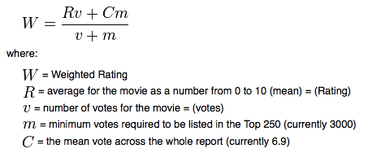

_Popularity Score is calculatedd from the given rating and n. of votes of the movie. This information has benn obtained from this [page](http://trailerpark.weebly.com/imdb-rating.html?source=post_page)_

In [25]:
## So instead of taking the minimun no of votes required to be in the top 250 list.
##I am taking the popularity as to be in top 40% of the list
m = movie_df1['Votes'].quantile(0.6)

In [26]:
## So minimum no of votes to get in the top 40% of the list is 1337.39 votes
m

1337.3999999999999

In [27]:
# from the above formula
v = movie_df1['Votes']
R = movie_df1['ImDBRating']
C = movie_df1['ImDBRating'].mean()
m = movie_df1['Votes'].quantile(0.8)

In [28]:
movie_df1['Pop_score_of_movie'] = ((R*v)+(C*m))/(v+m)

In [29]:
movie_sortedby_pop = movie_df1.sort_values('Pop_score_of_movie',ascending=False)
movie_sortedby_pop[['Title','Votes','ImDBRating','Pop_score_of_movie']].head(10)

,Title,Votes,ImDBRating,Pop_score_of_movie
11,Shershaah,90482,8.9,8.745882
0,3 Idiots,366038,8.4,8.366909
2,Taare Zameen Par,179838,8.4,8.333545
5,Dangal,170210,8.4,8.329889
48,Uri: The Surgical Strike,50418,8.3,8.086636
12,Gangs of Wasseypur,89184,8.2,8.079753
13,"Swades: We, the People",86790,8.2,8.076611
14,Andhadhun,81805,8.2,8.069512
18,Chak De! India,77253,8.2,8.062276
19,Drishyam,76424,8.2,8.060871


**Top 10 most acted actors**

In [30]:
actors = ''
for i in range(3000):
    actors = actors +','+  movie_df1['Cast_stars'][i]

In [31]:
actors_list = actors.split(",")

In [32]:
actors_unique_list = []
for i in actors_list:
    if i not in actors_unique_list:
        actors_unique_list.append(i)

In [33]:
dicti = {}
for i in range(0,len(actors_unique_list)):
    dicti[actors_unique_list[i]] = actors.count(actors_unique_list[i])
    

In [34]:
actors_df = pd.DataFrame.from_dict(dicti,orient="index")

In [35]:
actors_df.drop('',axis=0,inplace=True)

In [36]:
actors_df.columns=["No_of_movies"]

In [37]:
top_10_df = actors_df.sort_values("No_of_movies",ascending=False).head(10)

<function matplotlib.pyplot.show(close=None, block=None)>

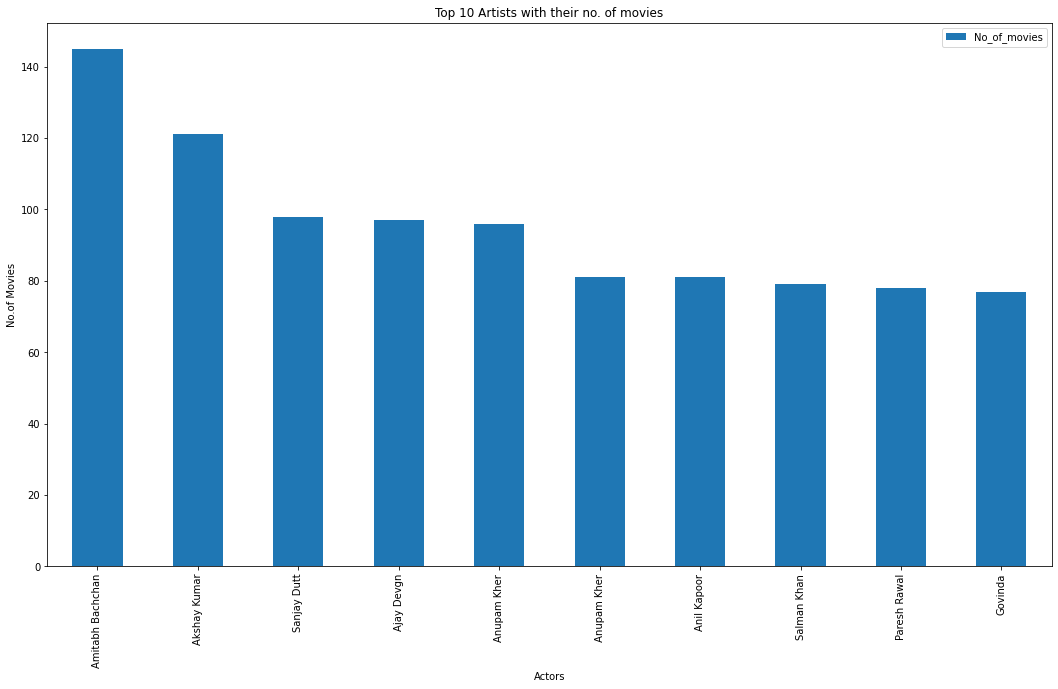

In [38]:
top_10_df.plot(kind='bar',figsize=(18,10),title='Top 10 Artists with their no. of movies',xlabel ="Actors",ylabel="No.of Movies")
plt.show